# IMPORTING ALL LIBRARIES REQUIRED 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# IMPORTING THE TRAINING AND TESTING DATASETS

In [2]:
train_data = pd.read_csv(r"D:\ZS TEST\cleanedtrain_file.csv")
train_data.head()

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,...,16-08-2002,15-08-2003,21-08-2002,11-04-2006,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",2
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,16-11-2005,15-11-2006,05-04-2006,12-06-2006,15-06-2006,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",1
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,22-07-2009,15-07-2011,22-07-2009,22-07-2009,NaN,NaN,NaN,NaN,NaN,2
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,11-02-2004,15-02-2005,10-02-2004,11-02-2004,NaN,NaN,NaN,NaN,NaN,2
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,16-05-2008,15-05-2010,04-06-2008,05-06-2008,NaN,NaN,NaN,NaN,NaN,2


In [3]:
test_data = pd.read_csv(r"D:\ZS TEST\cleanedtest_file.csv")
test_data.head()


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,16-02-2012,15-02-2014,19-01-2012,20-01-2012,29-12-2012,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,16-06-2011,15-06-2013,02-11-2012,05-11-2012,29-12-2012,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,16-11-2004,15-11-2005,06-12-2004,07-12-2004,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,16-08-2010,15-08-2012,NaN,04-11-2010,31-12-2012,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,16-08-2007,15-06-2009,15-08-2007,16-08-2007,26-03-2008,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


# CREATING NEW DATAFRAME FOR STORING THE FINAL PREDICTED RESULT 

In [4]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [5]:
# FINDING OUT THE TOTAL COUNT OF DIFFERENT LICENSE STATUS CLASS FROM 1-5
train_data['LICENSE STATUS'].value_counts()

2    55400
1    30200
5      290
4        3
3        2
Name: LICENSE STATUS, dtype: int64

In [6]:
# Dropping columns which will be of no use for our model
col_list = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION']

In [7]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [8]:
# Function to impute with ZERO VALUE FOR EMPTY DATA
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [9]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [10]:
train_data = create_dummies(train_data)

LEGAL NAME encoded


C:\Users\USER\AppData\Local\Temp/ipykernel_13228/3072490657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][mask] = label_encoder.fit_transform(df[i][mask])


DOING BUSINESS AS NAME encoded
cannot convert float NaN to integer
CITY encoded
STATE encoded
ZIP CODE encoded
Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']
WARD PRECINCT encoded
cannot convert float NaN to integer
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
APPLICATION REQUIREMENTS COMPLETE encoded
cannot convert float NaN to integer
PAYMENT DATE encoded
cannot convert float NaN to integer
CONDITIONAL APPROVAL encoded
LICENSE TERM START DATE encoded
cannot convert float NaN to integer
LICENSE TERM EXPIRATION DATE encoded
cannot convert float NaN to integer
LICENSE APPROVED FOR ISSUANCE encoded
cannot convert float NaN to integer
DATE ISSUED encoded
LICENSE STATUS CHANGE DATE encoded
cannot convert float NaN to integer


In [11]:
test_data = create_dummies(test_data)

LEGAL NAME encoded
DOING BUSINESS AS NAME encoded


C:\Users\USER\AppData\Local\Temp/ipykernel_13228/3072490657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][mask] = label_encoder.fit_transform(df[i][mask])


cannot convert float NaN to integer
CITY encoded
STATE encoded
WARD PRECINCT encoded
cannot convert float NaN to integer
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
APPLICATION REQUIREMENTS COMPLETE encoded
cannot convert float NaN to integer
PAYMENT DATE encoded
cannot convert float NaN to integer
CONDITIONAL APPROVAL encoded
LICENSE TERM START DATE encoded
cannot convert float NaN to integer
LICENSE TERM EXPIRATION DATE encoded
cannot convert float NaN to integer
LICENSE APPROVED FOR ISSUANCE encoded
cannot convert float NaN to integer
DATE ISSUED encoded
LICENSE STATUS CHANGE DATE encoded
cannot convert float NaN to integer


In [12]:
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))

In [13]:
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))

In [14]:
train_data.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME',
       'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT',
       'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LATITUDE', 'LONGITUDE',
       'LICENSE STATUS'],
      dtype='object')

In [15]:
imp_nil_list = ['ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME',
       'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT',
       'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LATITUDE', 'LONGITUDE']
impute_nil(imp_nil_list)

# DATA AFTER ENCODING AND FILLING THE EMPTY SPACES

In [16]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,LATITUDE,LONGITUDE,LICENSE STATUS
0,32811,1,6186,8529,193,16,1469,22.0,28.0,1936,...,2994,0,1452,165,2914,1183,0,41.843613,-87.714618,2
1,262311,29,16618,18723,193,16,1459,33.0,23.0,103,...,410,0,1498,212,595,1298,1505,41.961132,-87.699626,1
2,345008,1,10098,11349,466,16,943,0.0,0.0,2383,...,3124,0,2034,151,3039,2478,0,0.000000,0.000000,2
3,273121,1,1958,2276,585,16,1243,0.0,0.0,2383,...,1314,0,915,77,1282,1160,0,0.000000,0.000000,2
4,213785,1,23910,25227,1145,16,1011,0.0,0.0,2383,...,502,0,1413,127,487,496,0,0.000000,0.000000,2


In [17]:
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,LATITUDE,LONGITUDE
0,280120,1,28932,30776,59,13,255,42.0,67.0,642,...,1901,2975,0,1830,116,2927,2530,3736,41.890047,-87.637467
1,65043,1,8023,9209,59,13,280,16.0,5.0,1689,...,1794,288,0,1895,180,286,634,3736,41.786485,-87.676665
2,281270,1,20194,21700,59,13,250,4.0,8.0,1762,...,3396,944,0,1977,262,929,909,0,41.868269,-87.625695
3,335243,1,2688,2881,59,13,311,9.0,33.0,1597,...,1819,608,0,1932,218,0,499,3930,41.655762,-87.608686
4,283018,3,21668,10342,59,13,276,15.0,26.0,1513,...,2605,2406,0,1929,176,2359,2069,3249,41.816969,-87.699785


# STORING THE DATA AND STANDARDAZING IT FOR LESS DEVIATION

In [18]:
X = train_data.drop('LICENSE STATUS', axis=1)
y = train_data['LICENSE STATUS']

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.29227428, -0.17977005, -1.17011457, -1.01995961, -0.67533094,
        -0.13178147,  0.63566053,  0.59622025,  0.09566698,  0.12672646,
         0.63028984, -0.40691488, -0.12106603, -1.60504858,  0.61583007,
         1.67954327,  0.73335727, -0.01447764,  0.10171404,  0.85753448,
         0.74905374, -0.55779321, -0.61091629,  1.10384337, -1.10640561],
       [ 0.5173971 ,  3.05510897, -0.24953833, -0.18052883, -0.67533094,
        -0.13178147,  0.5999656 ,  1.25346738,  0.04494939, -2.17283746,
         1.51660843,  0.81299038,  0.20112479,  0.17536946,  0.61583007,
         0.77450558, -1.38488466, -0.01447764,  0.20264343,  1.77288935,
        -1.09620781, -0.43899249,  0.70937034,  1.10948375, -1.10606191],
       [ 1.16948596, -0.17977005, -0.82489848, -0.78774509,  0.18117689,
        -0.13178147, -1.24189305, -0.71827402, -0.18835155,  0.68750392,
        -0.63587959, -0.40291519, -0.89432398,  1.01203559, -1.39997435,
         0.75191997,  0.83992517, -0.01447764,  1

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (68716, 25) (68716,)
Test set: (17179, 25) (17179,)


# Lets check the K nearest neighbour model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [23]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 1, 2, 2], dtype=int64)

In [24]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9607369462716107
Test set Accuracy:  0.9379474940334129


## The F1 TEST SCORE FOR THE K MODEL

In [25]:
from sklearn.metrics import f1_score
kmodel=f1_score(y_test, yhat, average='weighted') 
kmodel

0.9368623776172079

In [26]:
#lets check which K is the best
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93323243, 0.92956517, 0.94056697, 0.93794749, 0.94079981,
       0.94045055, 0.9418476 , 0.94097445, 0.94213866])

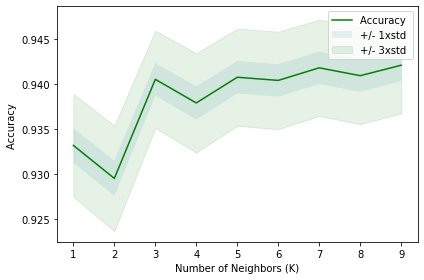

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9421386576634263 with k= 9


# Lets check the SVM MODEL

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]
from sklearn.metrics import f1_score
svmmodel=f1_score(y_test, yhat, average='weighted') 
svmmodel


0.982703567696146

# Lets check logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat = LR.predict(X_test)
yhat
lrmmodel=f1_score(y_test, yhat, average='weighted') 
lrmmodel

0.9608756172335655

In [32]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[4.43575384e-02, 9.30209911e-01, 7.29841551e-03, 7.16524620e-03,
        1.09688893e-02],
       [1.41651288e-01, 8.32450122e-01, 6.96407861e-03, 7.13234148e-03,
        1.18021693e-02],
       [9.67184039e-01, 6.50558061e-07, 6.90669908e-03, 7.00157069e-03,
        1.89070407e-02],
       ...,
       [1.58227627e-01, 8.18832063e-01, 6.97346883e-03, 7.07376285e-03,
        8.89307859e-03],
       [1.94726020e-02, 9.59688809e-01, 7.05676870e-03, 7.02053603e-03,
        6.76128400e-03],
       [2.32789650e-02, 9.57327686e-01, 7.09429969e-03, 6.96483553e-03,
        5.33421390e-03]])

# Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
yhat = drugTree.predict(X_test)
yhat
drmodel=f1_score(y_test, yhat, average='weighted') 
drmodel

0.9953790130268372

# MODEL COMPARISON BASED ON F1 TEST SCORE

In [58]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Decision Tree Model'],
    'Score': [lrmmodel, svmmodel, kmodel, drmodel]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree Model,0.995379
1,Support Vector Machines,0.982704
0,Logistic Regression,0.960876
2,K - Nearest Neighbors,0.936862


# Carrying out prediction for test data using SVM, k, LR, DTR model based on highest F1 test scores

In [59]:
my_pred = drugTree.predict(test_data)

In [60]:
my_submission['LICENSE STATUS'] = my_pred

In [61]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(5, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'INQ')

In [62]:
# Saving predictions to file
my_submission.to_csv(r'D:\ZS TEST\submission.csv', index=False)
print('Saved file to D drive')

Saved file to D drive
